In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt



In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# We can view all of the classes that automap found
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [7]:
# reflect an existing database into a new model
inspector = inspect(engine)

# reflect the tables
inspector.get_table_names()

['measurement', 'station']

In [8]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [11]:
# Save references to each table

measurement = Base.classes.measurement
station =Base.classes.station
print(station)

<class 'sqlalchemy.ext.automap.station'>


In [12]:
# Create our session (link) from Python to the DB

# Create a session
session = Session(engine)
# Use the session to query measurement table and display the first 5 precipitation
for row in session.query(measurement, measurement.prcp).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.measurement object at 0x00000247AF9E4D60>, 0.08)
(<sqlalchemy.ext.automap.measurement object at 0x00000247AF9E5810>, 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x00000247AF9E66E0>, 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x00000247AF9E5720>, 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x00000247AF9E73A0>, None)


In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= prev_year).all()

# Unpack the pricipitation and dates from the results and save into separate lists

prcp = [result[0] for result in results[:-1]]


dates = [(result[1]) for result in results[:-1]]

# print(results)
# results[-1]

In [ ]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results[:-1], columns=['date', 'prcp'])
df.set_index(df["date"] , inplace=True, )
df.sort_index()


# Use Pandas Plotting with Matplotlib to plot the data
# df.plot.bar(x=df['prcp'], y=index, **kwargs)
# ax = df.plot.bar(x='date', y='prcp', rot=90,figsize=(10, 7))

# plt.title("Parcipitation")
# plt.xlabel("date")
# plt.ylabel("Inches")
# ax.set_xticklabels(dates)


In [83]:
df.sort_index()
df.head(20)

,date,prcp
date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08
2016-08-26,2016-08-26,0.00
2016-08-27,2016-08-27,0.00
2016-08-28,2016-08-28,0.01
2016-08-29,2016-08-29,0.00
2016-08-30,2016-08-30,0.00
2016-08-31,2016-08-31,0.13


Text(0, 0.5, 'Inches')

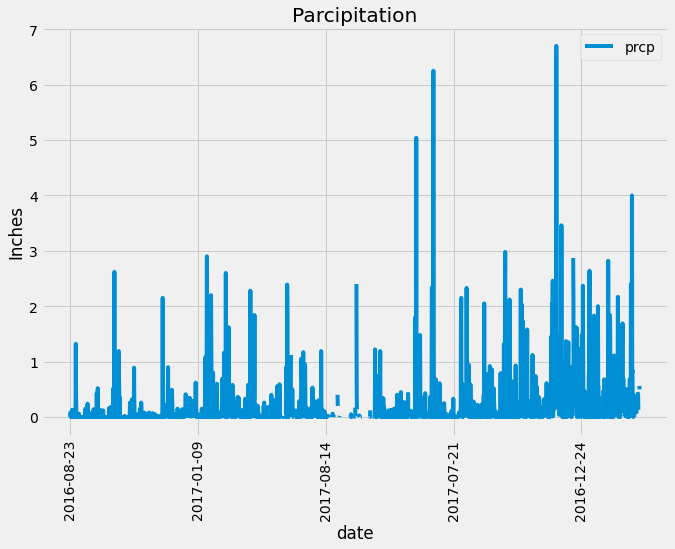

In [82]:

df.plot(rot=90,figsize=(10, 7))

plt.title("Parcipitation")
plt.xlabel("date")
plt.ylabel("Inches")

In [74]:
df.sort_index()
df


,date,prcp
date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08
2016-08-26,2016-08-26,0.00
2016-08-27,2016-08-27,0.00
...,...,...
2017-08-18,2017-08-18,NaN
2017-08-19,2017-08-19,0.09
2017-08-20,2017-08-20,NaN


# Exploratory Climate Analysis

In [ ]:
# Use Pandas Plotting with Matplotlib to plot the data




In [84]:
# Use Pandas to calculate the summary statistics for the precipitation data

df.describe()

,prcp
count,2020.000000
mean,0.177144
std,0.461264
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [87]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(station).all()
len(stations)

9

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
